# 8. Neural networks and deep learning
This week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification
Dataset:
* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:
* https://cs231n.github.io/

In [ ]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras
* Installing TensorFlow
* Loading images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf

2024-12-04 19:47:30.632423: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 19:47:30.648961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733341650.667017    3083 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733341650.672872    3083 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 19:47:30.692620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
tf.__version__

'2.18.0'

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

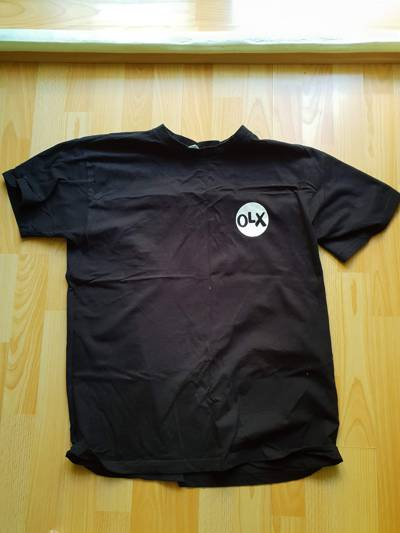

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

## 8.3 Pre-trained convolutional neural networks
Let's apply a pre-trained neural network with imagenet classes.
* Imagenet dataset: https://www.image-net.org/

We'll use Xception, but any other architecture will work as well.

Check here for a list of available models:
* https://keras.io/api/applications/
* https://www.tensorflow.org/api_docs/python/tf/keras/applications

We'll need to import 3 things:

* the model itself (Xception)
* the preprocess_input function that takes an image and prepares it
* the decode_predictions that converts the predictions of the model into human-readable classes

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

Let's load the model. The pre-trained model expects 299x299 input

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733341815.078878    3083 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Next,

* we load the image using the load_img function
* convert it to a numpy array
* make it a batch of one example

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

We're ready!

Next, we will:

* prepare the input
* do the predictions
* convert the predictions into a human-readable format

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

I0000 00:00:1733341890.481936    5715 service.cc:148] XLA service 0x7f801c037920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733341890.481966    5715 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-04 19:51:30.516717: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733341890.827757    5715 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-04 19:51:31.957262: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733341892.765595    5715 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [13]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

Not quite what we wanted... Let's train our own model

## 8.4 Convolutional neural networks
* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning
* Reading data with ImageDataGenerator

Instead of loading each image one-by-one, we can use a data generator. Keras will use it for loading the images and pre-processing them

* Train Xception on smaller images (150x150), it'll be faster

(Better to run it with a GPU)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Let's get train data:

In [15]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [16]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
X, y = next(train_ds)

In [18]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

And validation:

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


For fine-tuning, we'll use Xception with small images (150x150)

Let's add a small neural net on top of that: just one layer with 10 neurons (there are 10 classes we want to predict)

In [20]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Now we specify the learning rate and compile the model. After that, it's ready for training

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Let's train now for 10 epochs:

In [22]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 183ms/step - accuracy: 0.6073 - loss: 1.5257 - val_accuracy: 0.7595 - val_loss: 0.8719
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8150 - loss: 0.6206 - val_accuracy: 0.7889 - val_loss: 0.8171
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8846 - loss: 0.3473 - val_accuracy: 0.7889 - val_loss: 0.8779
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9292 - loss: 0.2301 - val_accuracy: 0.8182 - val_loss: 0.7671
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9523 - loss: 0.1537 - val_accuracy: 0.8035 - val_loss: 0.8942
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9658 - loss: 0.1117 - val_accuracy: 0.8094 - val_loss: 0.9705
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9738 - loss: 0.0822 - val_accuracy: 0.8182 - val_loss: 0.9150
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.8182 - val_loss: 

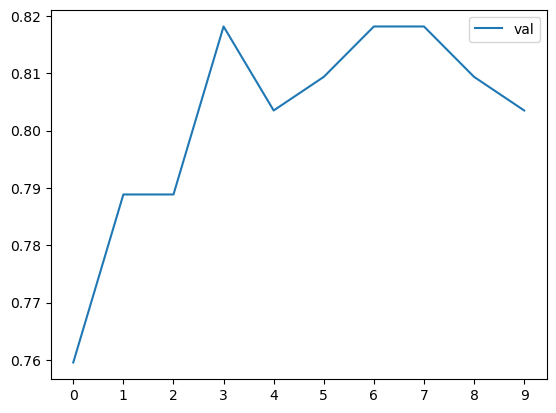

In [24]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate
* What's the learning rate
* Trying different values

To make it easier for us, let's make a function for defining our model:

In [25]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.3276 - loss: 2.0273 - val_accuracy: 0.5073 - val_loss: 1.4999
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5487 - loss: 1.4469 - val_accuracy: 0.6217 - val_loss: 1.1853
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6322 - loss: 1.1569 - val_accuracy: 0.6979 - val_loss: 1.0172
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6837 - loss: 1.0207 - val_accuracy: 0.7243 - val_loss: 0.9132
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7127 - loss: 0.9192 - val_accuracy: 0.7331 - val_loss: 0.8477
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7458 - loss: 0.8254 - val_accuracy: 0.7595 - val_loss: 0.7918
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7468 - loss: 0.8011 - val_accuracy: 0.7654 - val_loss: 0.7583
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7690 - loss: 0.7390 - val_accuracy: 0

In [32]:
del scores[0.1]
del scores[0.0001]

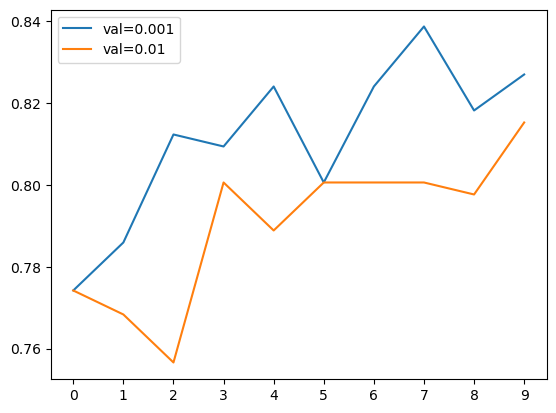

In [33]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [34]:
learning_rate = 0.001

## 8.7 Checkpointing
* Saving the best model only
* Training a model with callbacks

To save the best model, we can use a callback. It'll monitor the accuracy, and if it's an improvement over the previous version, it'll save the model to disk

In [36]:
model.save('model_v1.keras')

In [37]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [38]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.4718 - loss: 1.5336 - val_accuracy: 0.7625 - val_loss: 0.7193
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7666 - loss: 0.6758 - val_accuracy: 0.7918 - val_loss: 0.6136
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8429 - loss: 0.4974 - val_accuracy: 0.8123 - val_loss: 0.5725
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8631 - loss: 0.4424 - val_accuracy: 0.8182 - val_loss: 0.5316
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.8945 - loss: 0.3612 - val_accuracy: 0.8358 - val_loss: 0.5323
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9079 - loss: 0.3277 - val_accuracy: 0.8299 - val_loss: 0.5354
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9277 - loss: 0.2818 - val_accuracy: 0.8211 - val_loss: 0.5417
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9373 - loss: 0.2502 - val_accuracy: 0.8358 -

## 8.8 Adding more layers
* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.3788 - loss: 1.8315 - val_accuracy: 0.6217 - val_loss: 1.2153
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6412 - loss: 1.1337 - val_accuracy: 0.6921 - val_loss: 1.0014
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7169 - loss: 0.9002 - val_accuracy: 0.7067 - val_loss: 0.9042
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7812 - loss: 0.7384 - val_accuracy: 0.7243 - val_loss: 0.8585
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8110 - loss: 0.6174 - val_accuracy: 0.7654 - val_loss: 0.7564
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8472 - loss: 0.4964 - val_accuracy: 0.7889 - val_loss: 0.7092
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8763 - loss: 0.4161 - val_accuracy: 0.7859 - val_loss: 0.6921
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9060 - loss: 0.3551 - val_accuracy: 0.800

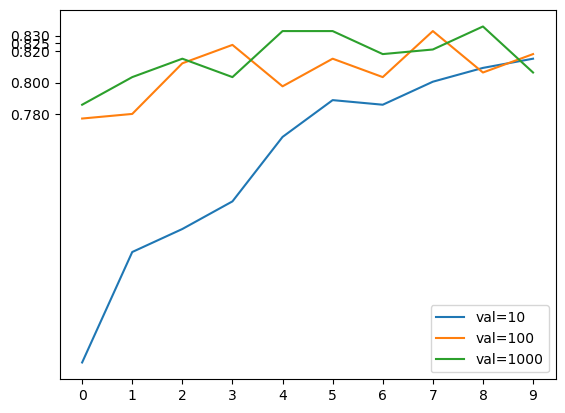

In [41]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout
* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [42]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [43]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.5602 - loss: 1.2997 - val_accuracy: 0.7830 - val_loss: 0.6573
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8134 - loss: 0.5332 - val_accuracy: 0.7977 - val_loss: 0.6136
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8816 - loss: 0.3782 - val_accuracy: 0.8299 - val_loss: 0.5340
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9335 - loss: 0.2317 - val_accuracy: 0.8006 - val_loss: 0.5713
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9399 - loss: 0.2048 - val_accuracy: 0.8182 - val_loss: 0.5244
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9749 - loss: 0.1253 - val_accuracy: 0.8065 - val_loss: 0.6075
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9855 - loss: 0.0978 - val_accuracy: 0.8182 - val_loss: 0.6114
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9919 - loss: 0.0696 - val_accuracy: 0.80

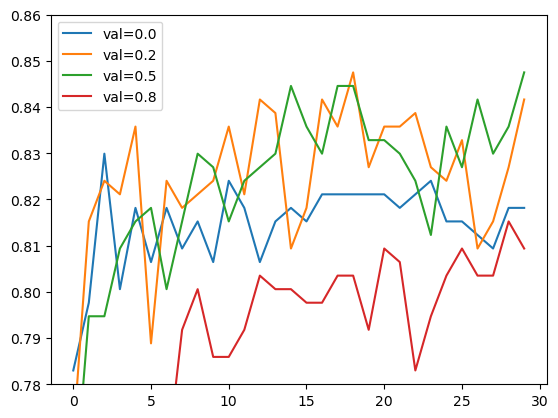

In [51]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
    # plt.plot(hist['accuracy'], label=('train=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

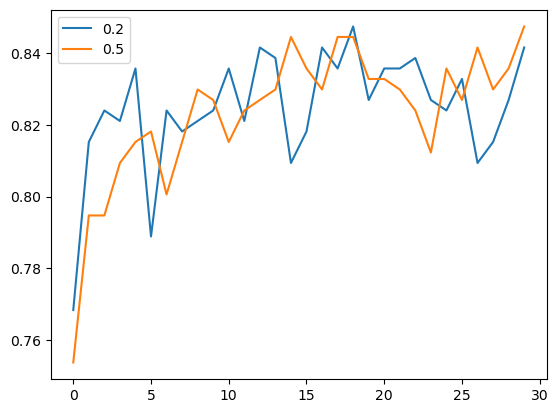

In [52]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()

## 8.10 Data augmentation
* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 231ms/step - accuracy: 0.5228 - loss: 1.4185 - val_accuracy: 0.7683 - val_loss: 0.6794
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.7466 - loss: 0.7409 - val_accuracy: 0.8123 - val_loss: 0.6043
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.7857 - loss: 0.5949 - val_accuracy: 0.8065 - val_loss: 0.5640
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.8453 - loss: 0.4603 - val_accuracy: 0.8328 - val_loss: 0.5444
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.8486 - loss: 0.4467 - val_accuracy: 0.8094 - val_loss: 0.5788
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.8651 - loss: 0.4096 - val_accuracy: 0.8182 - val_loss: 0.5313
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8686 - loss: 0.3602 - val_accuracy: 0.8182 - val_loss: 0.5562
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.8834 - loss: 0.3347 - val_accu

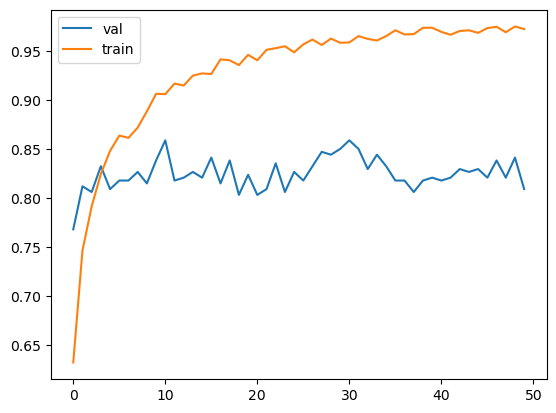

In [61]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model
* Train a 299x299 model

In [62]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [63]:
input_size = 299

In [64]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [65]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [66]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2024-12-04 23:51:38.424117: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


50/96 ━━━━━━━━━━━━━━━━━━━━ 24s 540ms/step - accuracy: 0.4573 - loss: 1.6716

2024-12-04 23:52:15.934532: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.5476 - loss: 1.4102

2024-12-04 23:52:57.250055: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 825ms/step - accuracy: 0.5490 - loss: 1.4060 - val_accuracy: 0.8328 - val_loss: 0.5434
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 617ms/step - accuracy: 0.8248 - loss: 0.5275 - val_accuracy: 0.8680 - val_loss: 0.4215
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 616ms/step - accuracy: 0.8496 - loss: 0.4418 - val_accuracy: 0.8798 - val_loss: 0.4107
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 607ms/step - accuracy: 0.8706 - loss: 0.3974 - val_accuracy: 0.8710 - val_loss: 0.3894
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 596ms/step - accuracy: 0.8763 - loss: 0.3514 - val_accuracy: 0.8680 - val_loss: 0.3905
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 603ms/step - accuracy: 0.9026 - loss: 0.3025 - val_accuracy: 0.8827 - val_loss: 0.3953
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 603ms/step - accuracy: 0.8927 - loss: 0.3008 - val_accuracy: 0.8886 - val_loss: 0.3571
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 601ms/step - accuracy: 0.9010 - loss: 0.2866 - val_accuracy: 0.894

## 8.12 Using the model
* Loading the model
* Evaluating the model
* Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras

2024-12-05 00:42:28.643312: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 00:42:28.660558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733359348.680037   58265 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733359348.685995   58265 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 00:42:28.705280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [3]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [4]:
model = keras.models.load_model('xception_v4_1_21_0.903.keras')

I0000 00:00:1733359443.517678   58265 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [5]:
model.evaluate(test_ds)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733359481.296604   58594 service.cc:148] XLA service 0x7f65a4039460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733359481.296630   58594 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-05 00:44:41.346392: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733359481.680699   58594 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 00:44:48.752561: W external/local_xla/xla/tsl/f

 1/12 ━━━━━━━━━━━━━━━━━━━━ 2:16 12s/step - accuracy: 0.8438 - loss: 0.3728

I0000 00:00:1733359491.647418   58594 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8608 - loss: 0.3609

2024-12-05 00:44:58.893337: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 864ms/step - accuracy: 0.8669 - loss: 0.3483


[0.2792162597179413, 0.9005376100540161]

In [6]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [7]:
img = load_img(path, target_size=(299, 299))

In [8]:
import numpy as np
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [10]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, pred[0]))

{'dress': np.float32(-3.6538997),
 'hat': np.float32(-8.282387),
 'longsleeve': np.float32(-0.87667376),
 'outwear': np.float32(-1.8054606),
 'pants': np.float32(11.081939),
 'shirt': np.float32(-0.04272306),
 'shoes': np.float32(-2.7690196),
 'shorts': np.float32(3.4796627),
 'skirt': np.float32(-4.17676),
 't-shirt': np.float32(-3.5644417)}

In [13]:
print(pred[0].argmax())
print(classes[pred[0].argmax()])

4
pants


## 8.13 Summary
* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trains. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more
* Add more data, e.g. Zalando, etc
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:
* cats vs dogs
* Hotdog vs not hotdog
* Category of images